# Classification

## Background and Problem Statement
Our client, one of the world's leading banking companies wants to analyse it's liability customer base in order to predict the likelihood of a liability bank customer whether applying for a personal loan or not. So that bank's retail department can perform targeted marketing campaigns by identifying their potential liability customers who have some interest in purchasing the loan at the reduced campaign cost which ultimately helps them in startegising the ways to convert their liability customers to personal loan customers (while still retaining them as depositors).

## Dataset Description
- Cust_Age : Age of a customer.
- Qualification : Customer's level of degree pursued ; level_1: UnderGraduate; level_2: PostGraduate; level_3: Advanced degree.
- Work_exp : Number of professional/working experience of a customer.
- Anual_Income : Customer's income per Annum in ₹000 (Eg: ₹ 3472.2 means ₹ 3472200)
- House_Mortgage : If customer has any house mortgage then it's value in ₹000.
- Fam_size : Count of a customer's family members.
- CreditCard_usage : Coustomer's usage status of credit card issued by universal bank ; Active: Using it , Inactive: Not using.
- AvgCC : Customer's per month Average spending on credit card in ₹000.
- Brokerage_Acc : Whether customer has already created brokerage/security account with the bank (NO , YES)
- CD_Acc : whether customer has created has already created certificate of deposit (CD) account with the bank (NO , YES)
- Banking_type : Customer's preffered method of banking ; Online: Internet banking , Offline: traditional/physical banking.
- Personal_loan : Customer's CTA (call to action) status from bank's past marketing campaigning efforts regarding personal loan offerings ; (Applied : Customer applied to the personal loan , Denied : Didn't respond)
- ID_Cust : General ID created for customer's reference


## Importing Libraries and Dataset


In [30]:
# Data Exploration and Classification of the dataset

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
# Importing the dataset
dataset = pd.read_csv('Classification.csv')

## Data Exploration

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cust_Age          10000 non-null  int64  
 1   Qualification     10000 non-null  object 
 2   Work_exp          10000 non-null  int64  
 3   Anual_Income      10000 non-null  float64
 4   House_Mortgage    10000 non-null  float64
 5   Fam_size          10000 non-null  int64  
 6   CreditCard_usage  10000 non-null  object 
 7   AvgCC             10000 non-null  float64
 8   Brokerage_Acc     10000 non-null  object 
 9   CD_Acc            10000 non-null  object 
 10  Banking_type      10000 non-null  object 
 11  Personal_loan     10000 non-null  object 
 12  ID_Cust           10000 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [33]:
# Data Exploration
dataset.head()

,Cust_Age,Qualification,Work_exp,Anual_Income,House_Mortgage,Fam_size,CreditCard_usage,AvgCC,Brokerage_Acc,CD_Acc,Banking_type,Personal_loan,ID_Cust
0,65,level_1,39,3472.2,7298.1,2,Inactive,56.68704,NO,NO,Online,Denied,1
1,57,level_3,31,11266.2,0.0,2,Inactive,276.34932,NO,NO,Offline,Applied,2
2,57,level_3,25,3117.6,0.0,4,Inactive,70.85880,NO,NO,Online,Denied,3
3,33,level_2,4,3826.8,7723.8,3,Active,70.85880,NO,NO,Offline,Denied,4
4,57,level_2,29,4392.9,0.0,4,Inactive,21.25764,NO,NO,Online,Denied,5


In [34]:
dataset.describe()

,Cust_Age,Work_exp,Anual_Income,House_Mortgage,Fam_size,AvgCC,ID_Cust
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,47.338400,20.10460,5227.548480,4003.440480,3.396400,137.319961,5000.50000
std,11.462592,11.46738,3261.729255,7206.961751,1.147606,123.830826,2886.89568
min,25.000000,-3.00000,567.000000,0.000000,2.000000,0.000000,1.00000
25%,37.000000,10.00000,2763.900000,0.000000,2.000000,49.601160,2500.75000
50%,47.000000,20.00000,4535.100000,0.000000,3.000000,106.288200,5000.50000
75%,57.000000,30.00000,6944.400000,7156.800000,4.000000,177.147000,7500.25000
max,69.000000,43.00000,15872.400000,44995.500000,5.000000,708.588000,10000.00000


## Checking for missing values

<AxesSubplot:>

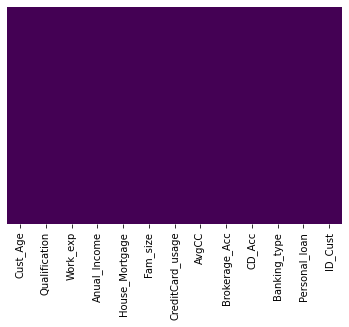

In [35]:
import seaborn as sns
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
# Checking for missing values
dataset.isnull().sum()

Cust_Age            0
Qualification       0
Work_exp            0
Anual_Income        0
House_Mortgage      0
Fam_size            0
CreditCard_usage    0
AvgCC               0
Brokerage_Acc       0
CD_Acc              0
Banking_type        0
Personal_loan       0
ID_Cust             0
dtype: int64

In [37]:
# Dropping the missing values and duplicates
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

In [38]:
dataset.shape

(10000, 13)

## Check for outliers

<AxesSubplot:>

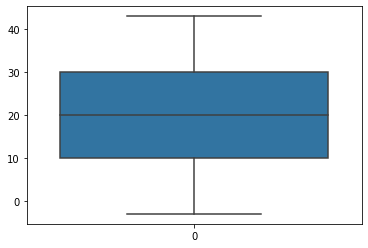

In [39]:
# Checking for outliers 
sns.boxplot(dataset['Work_exp']) 

<AxesSubplot:>

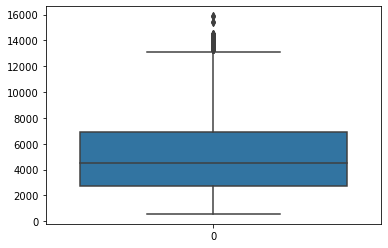

In [40]:
sns.boxplot(dataset['Anual_Income'])

<AxesSubplot:>

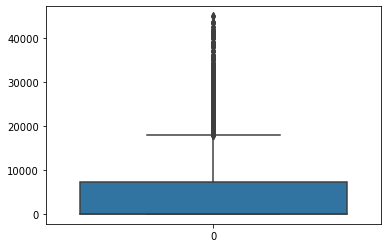

In [41]:
sns.boxplot(dataset['House_Mortgage'])

<AxesSubplot:>

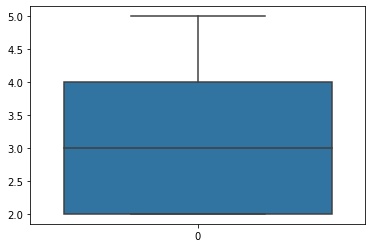

In [42]:
sns.boxplot(dataset['Fam_size'])

<AxesSubplot:>

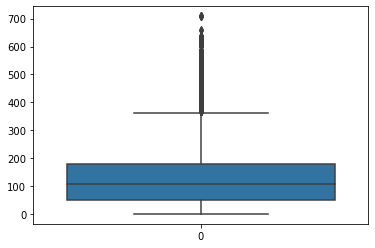

In [43]:
sns.boxplot(dataset['AvgCC'])

## Checking Correlation between variables

<AxesSubplot:>

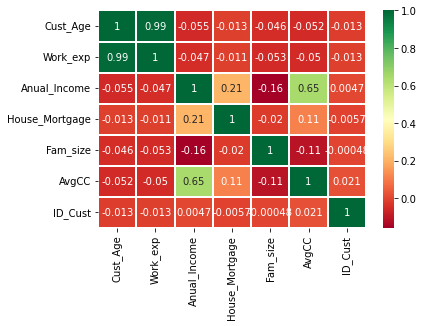

In [44]:
# Heatmap to check the correlation between the variables
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

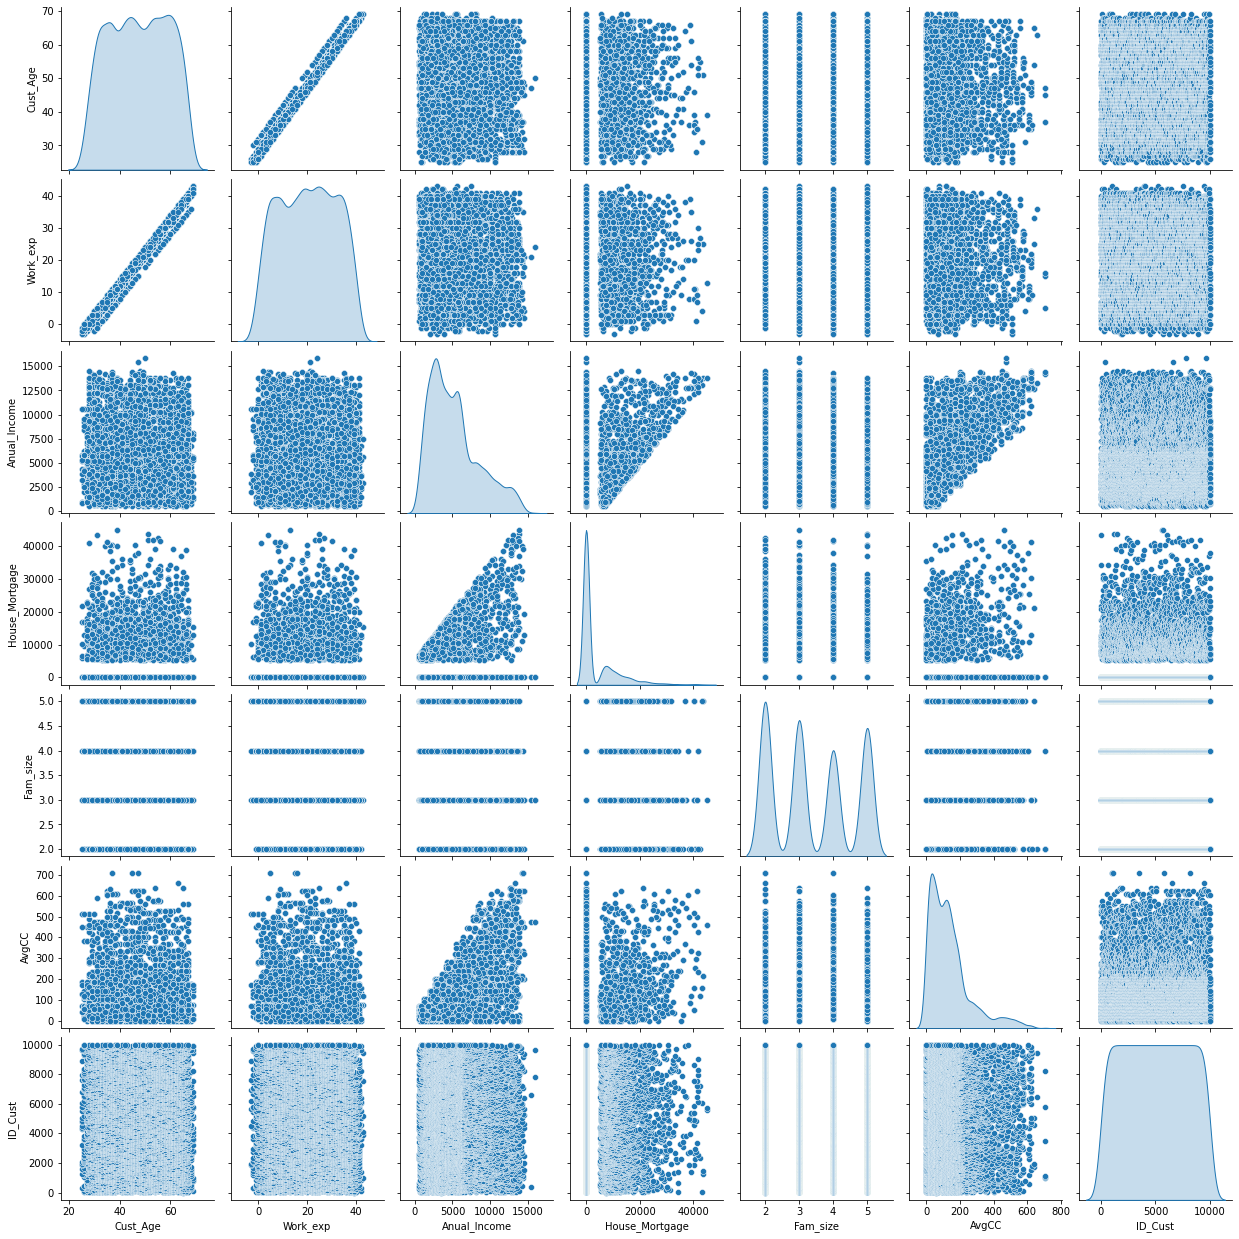

In [45]:
# pairplot to check the correlation between the variables
sns.pairplot(dataset, diag_kind='kde')

In [46]:
data = dataset.copy()

# Preprocess the data
label = LabelEncoder()
data['Qualification'] = label.fit_transform(data['Qualification'])
data['CreditCard_usage'] = label.fit_transform(data['CreditCard_usage'])
data['Brokerage_Acc'] = label.fit_transform(data['Brokerage_Acc'])
data['CD_Acc'] = label.fit_transform(data['CD_Acc'])
data['Banking_type'] = label.fit_transform(data['Banking_type'])
data['Personal_loan'] = label.fit_transform(data['Personal_loan'])

# Split the data into input features (X) and target variable (y)
X = data.drop(['Personal_loan', 'ID_Cust'], axis=1)
y = data['Personal_loan']


In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)


## Desision Tree Classifier

In [48]:
# Train a decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)


In [49]:
# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       248
           1       1.00      1.00      1.00      2252

    accuracy                           1.00      2500
   macro avg       0.99      1.00      0.99      2500
weighted avg       1.00      1.00      1.00      2500



Accuracy: 0.9976


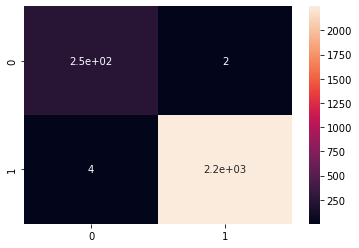

In [50]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


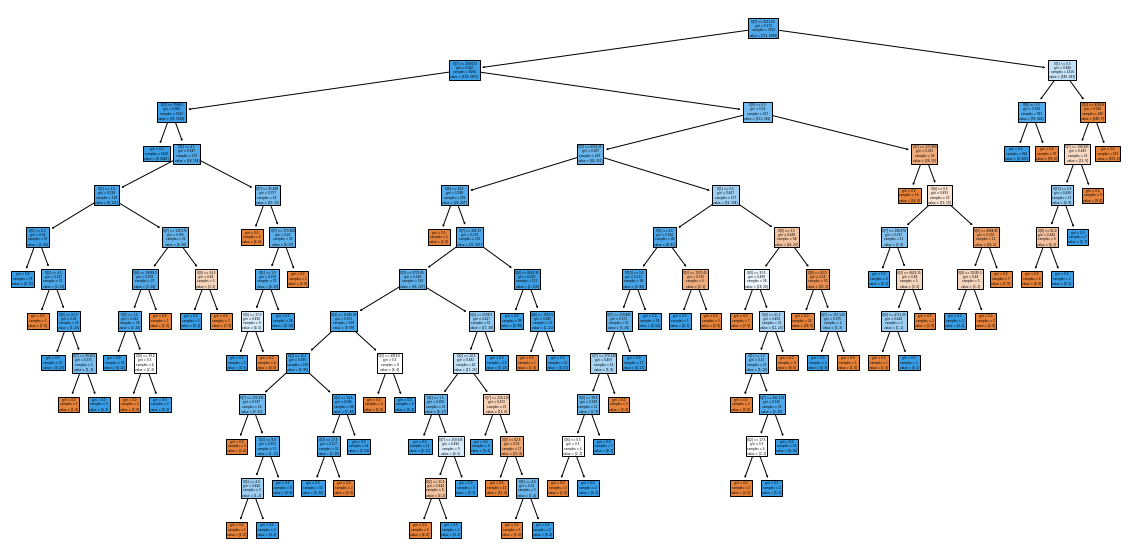

In [51]:
# Visualize the decision tree
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier, filled=True)
plt.show()

## Random Forest

In [52]:
# Classification using Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       248
           1       0.99      1.00      1.00      2252

    accuracy                           0.99      2500
   macro avg       0.99      0.98      0.98      2500
weighted avg       0.99      0.99      0.99      2500



Accuracy: 0.9944


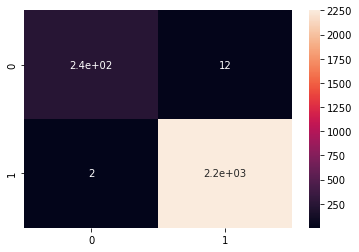

In [53]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

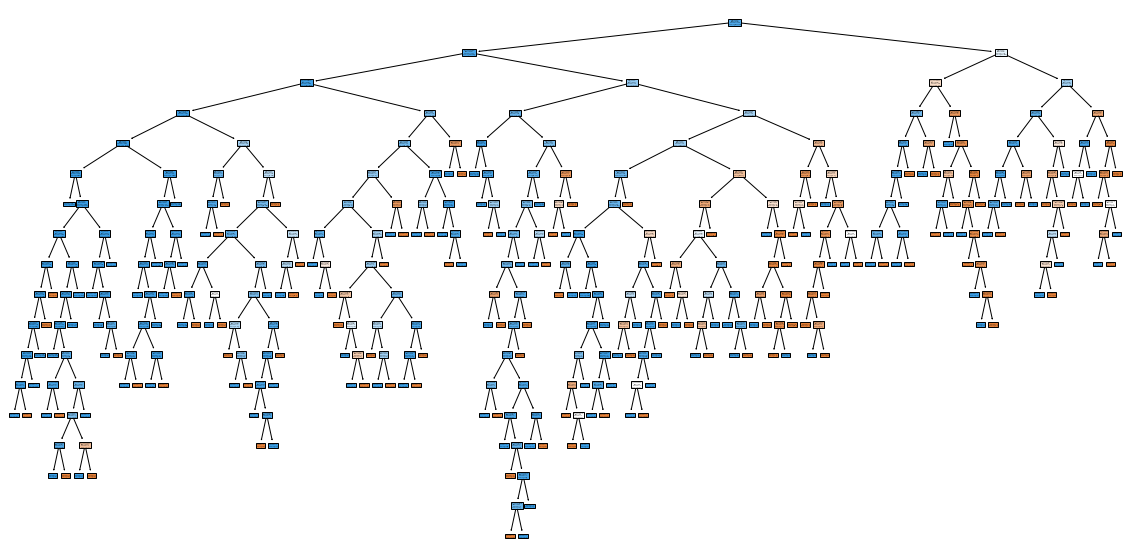

In [54]:
# Visualize the random forest
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(classifier.estimators_[0], filled=True)
plt.show()

## XGBoost Classifier

In [55]:
# Classification using XGBoost
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       248
           1       1.00      1.00      1.00      2252

    accuracy                           1.00      2500
   macro avg       1.00      0.99      0.99      2500
weighted avg       1.00      1.00      1.00      2500



Accuracy: 0.9976


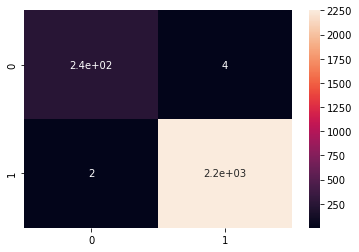

In [56]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


## AdaBoost Classifier

In [57]:
# Classify using AdaBoost
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.79      0.81       248
           1       0.98      0.98      0.98      2252

    accuracy                           0.96      2500
   macro avg       0.91      0.88      0.90      2500
weighted avg       0.96      0.96      0.96      2500



Accuracy: 0.9636


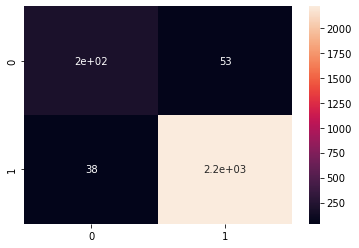

In [58]:
# plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

In [59]:
# Ensemble Methods
# Path: Emsemble Methods\Roshan_kumar_Ensemble.ipynb
# Data Exploration and Classification of the dataset


# Importing the libraries
import numpy as np

import pandas as pd
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Importing the dataset
dataset = pd.read_csv('Classification.csv')

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cust_Age          10000 non-null  int64  
 1   Qualification     10000 non-null  object 
 2   Work_exp          10000 non-null  int64  
 3   Anual_Income      10000 non-null  float64
 4   House_Mortgage    10000 non-null  float64
 5   Fam_size          10000 non-null  int64  
 6   CreditCard_usage  10000 non-null  object 
 7   AvgCC             10000 non-null  float64
 8   Brokerage_Acc     10000 non-null  object 
 9   CD_Acc            10000 non-null  object 
 10  Banking_type      10000 non-null  object 
 11  Personal_loan     10000 non-null  object 
 12  ID_Cust           10000 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB
